In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mplhep as hep

In [12]:
SI_Y1m_00 =  1.4447  
SI_Y1m_01 = -1.20155  
SI_Y1m_02 =  1.5391 
SI_Y1m_03 =  0.0000 
SI_Y1m_04 = -0.167832
SI_Y1m_05 = -0.595340
SI_Y1m_06 = -1.32335
SI_Y1m_07 = -0.821413
SI_Y1m_08 = -0.322782
SI_Y1m_09 = -0.410324
SI_Y1m_10 = -0.111801
SI_Y1m_11 = -0.180511

SR_Y1m_00 =  2.2323
SR_Y1m_01 =  2.9303
SR_Y1m_02 =  1.8699
SR_Y1m_03 =  1.0000
SR_Y1m_04 =  1.6597
SR_Y1m_05 =  2.1646
SR_Y1m_06 =  1.7203
SR_Y1m_07 =  1.4143
SR_Y1m_08 =  0.32838
SR_Y1m_09 =  0.051407
SR_Y1m_10 =  0.60007
SR_Y1m_11 =  0.79197
dict_SI = {}
dict_SR = {}
for i in range(0,12):
    dict_SI["SI_Y1m_{0:02d}".format(i)] = eval("SI_Y1m_{0:02d}".format(i))
    dict_SR["SR_Y1m_{0:02d}".format(i)] = eval("SR_Y1m_{0:02d}".format(i))
dict_all = dict_SI.copy()
dict_all.update(dict_SR)
df_realvalue = pd.DataFrame(dict_all,index=[0])
for i in range(0,12):
    """ This part, the complex number = H*ci
    df_realvalue["modulus_{0:02d}".format(i)] = np.sqrt(pow(df_realvalue["SR_{0:02d}".format(i)] * df_realvalue["ar_H0_Fwave"] - df_realvalue["SI_{0:02d}".format(i)] * df_realvalue["ai_H0_Fwave"],2) + pow(df_realvalue["SI_{0:02d}".format(i)] * df_realvalue["ar_H0_Fwave"] + df_realvalue["SR_{0:02d}".format(i)] * df_realvalue["ai_H0_Fwave"],2))
    df_realvalue["phase_{0:02d}".format(i)] = 2*np.arctan2((df_realvalue["SI_{0:02d}".format(i)] * df_realvalue["ar_H0_Fwave"] + df_realvalue["SR_{0:02d}".format(i)] * df_realvalue["ai_H0_Fwave"]),df_realvalue["modulus_{0:02d}".format(i)] + df_realvalue["SR_{0:02d}".format(i)] * df_realvalue["ar_H0_Fwave"] - df_realvalue["SI_{0:02d}".format(i)] * df_realvalue["ai_H0_Fwave"] )
    """
    df_realvalue["modulus_{0:02d}".format(i)] = np.sqrt(pow(df_realvalue["SR_Y1m_{0:02d}".format(i)],2) + pow(df_realvalue["SI_Y1m_{0:02d}".format(i)],2))
    df_realvalue["phase_{0:02d}".format(i)] = 2*np.arctan2(df_realvalue["SI_Y1m_{0:02d}".format(i)],df_realvalue["modulus_{0:02d}".format(i)] + df_realvalue["SR_Y1m_{0:02d}".format(i)] )

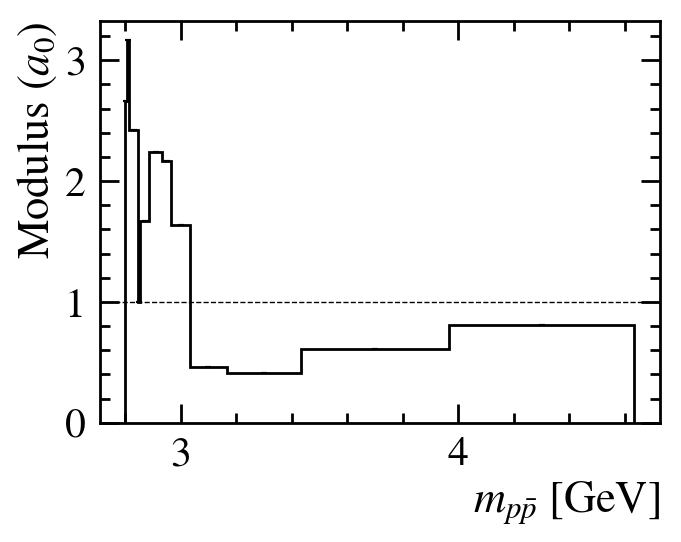

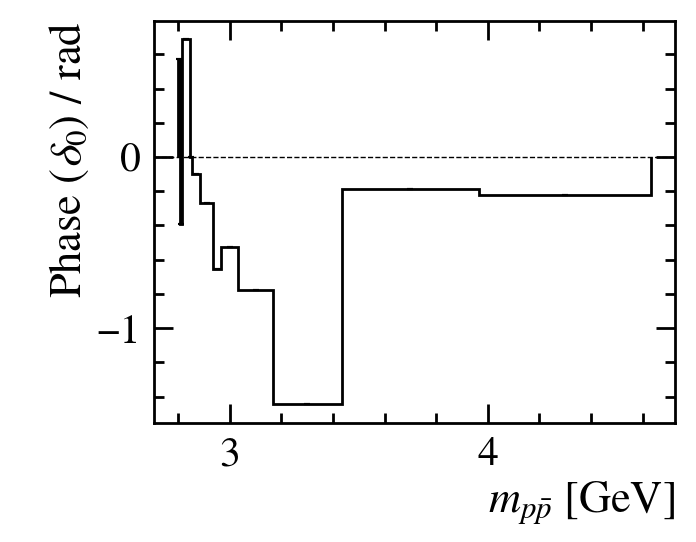

In [25]:
df_modulus = df_realvalue.filter(regex="modulus")
df_phase = df_realvalue.filter(regex="phase")
list_modulus_values = df_modulus.values[0]
list_phase_values = df_phase.values[0]
list_dat = [2.803,2.81,2.83,2.85,2.87,2.91,2.95,3.0,3.1,3.3,3.7,4.3]
list_edge = [list_dat[0]-(list_dat[1]-list_dat[0])/2.0]
for i in range(len(list_dat)):
    to_append = list_dat[i]+list_dat[i]-list_edge[i]
    list_edge.append(to_append)

hep.style.use(hep.style.LHCb2)
fig1,ax1 = plt.subplots(figsize=(9,7)) # Create a new figure and axis
hep.histplot(list_modulus_values,bins=list_edge,yerr=0,ax=ax1,histtype="step",color="black",label="Data with stat uncertainty") # Plot the data as a histogram with error bars
ax1.set_xlabel(r"$m_{p\bar{p}}$ [GeV]") # Set the x-axis label
ax1.set_ylabel(r"Modulus ($a_{0}$)") # Set the y-axis label
ax1.axhline(y=1.0,linestyle="dashed",color="black",linewidth=1.0) # Add a horizontal line at y=0.0
# Create the second histogram of phase values
fig2,ax2 = plt.subplots(figsize=(9,7)) # Create a new figure and axis
hep.histplot(list_phase_values,bins=list_edge,yerr=0,ax=ax2,histtype="step",color="black",label="Data with stat uncertainty") # Plot the data as a histogram with error bars
ax2.set_xlabel(r"$m_{p\bar{p}}$ [GeV]") # Set the x-axis label
ax2.set_ylabel(r"Phase ($\delta_{0}$) / rad") # Set the y-axis label
ax2.axhline(y=0.0,linestyle="dashed",color="black",linewidth=1.0) # Add a horizontal line at y=0.0
fig1.savefig("modulus.pdf")
fig2.savefig("phase.pdf")